In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
np.random.seed(19680801)

In [3]:
# dataset1
#             C1  C2  C3
# Treatment1 : 
# Treatment2 : 

# dataset2
#             C1  C2  C3
# Treatment1 : 
# Treatment2 : 

In [ ]:
def plot_sector(data, tit):
    N = len(data.values.reshape(-1))
    unit = 2 * np.pi / (2*N)
    start_lst = np.linspace(0.0, 2 * np.pi, 3, endpoint=False)
    theta_lst = []
    for i in start_lst:
        k = i
        for j in range(3):
            theta_lst.append(k)
            k = k+unit
    theta = theta_lst #np.linspace(0.0, 2 * np.pi, N, endpoint=False)

    radii = data.values.reshape(-1)
    width = np.pi / 4 * np.array([0.4]*N)

    ax = plt.subplot(projection='polar')
    bars = ax.bar(theta, radii, width=width, bottom=0.0, align='edge', edgecolor=None, lw=0.8)

    colors = ["#ffcc00", "#ff9933", "#6666ff"]*3   
    for bar, color in zip(bars, colors):
        bar.set_color(color)
        bar.set_edgecolor("black")

    ax.tick_params(labelbottom=False, labeltop=False,
                           labelleft=True, labelright=False,labelsize=8)

    ax.grid(lw=0.2, color='0.9')
    plt.title(tit)
    plt.legend(["C1","C2","C3"])
    plt.show()

In [6]:
df_mimic= pd.read_csv("/public/hanl/jupyter_dir/kidney_sepsis_penotype_v2/00.data_mimic/treatment/mimic_lifesupport.csv")

df_type_filt = pd.read_csv("/public/hanl/jupyter_dir/kidney_sepsis_penotype_v2/01.MIMICIV_SAKI_trajCluster//df_mixAK_fea4_C3.csv")
df_type_filt = df_type_filt[["stay_id","groupHPD"]].drop_duplicates()
df_mimic = pd.merge(df_mimic, df_type_filt, how="right",on="stay_id")
df_mimic= df_mimic.fillna(0)

df_type_count = df_mimic.groupby(["groupHPD"]).agg({"stay_id":"count"}).reset_index()
df_type_count = df_type_count.rename(columns={"stay_id":"count_all"})

fea_lst = ["is_rrt","is_mv","is_vaso"]
df_mimic_percent_all = pd.DataFrame()
for fea in fea_lst:
    df_mimic_percent = df_mimic.groupby(["groupHPD",fea]).agg({"stay_id":"count"}).reset_index()
    df_mimic_percent = df_mimic_percent.rename(columns={"stay_id":"count"})
    df_mimic_percent = pd.merge(df_mimic_percent,df_type_count, how="left",on="groupHPD" )
    df_mimic_percent["percent"] = df_mimic_percent["count"] / df_mimic_percent["count_all"] 
    df_mimic_percent = df_mimic_percent.loc[df_mimic_percent[fea]==1,["groupHPD","percent"]]
    df_mimic_percent.index = pd.RangeIndex(len(df_mimic_percent.index))
    df_mimic_percent = df_mimic_percent.drop(["groupHPD"],axis=1)
    df_mimic_percent= df_mimic_percent.rename(columns={"percent":fea}).T
    df_mimic_percent_all = pd.concat([df_mimic_percent_all,df_mimic_percent],axis=0)
df_mimic_percent_all.columns = ["C1","C2","C3"]
df_mimic_percent_all

,C1,C2,C3
is_rrt,0.046225,0.004910,0.258333
is_mv,0.970724,0.963011,0.975000
is_vaso,0.197997,0.077905,0.438889


In [7]:
df_eICU= pd.read_csv("/public/hanl/jupyter_dir/kidney_sepsis_penotype_v2//00.data_eicu/treatment//eicu_lifesupport.csv")

df_type_filt = pd.read_csv("/public/hanl/jupyter_dir/kidney_sepsis_penotype_v2//03.eICU_SAKI_trajCluster/df_mixAK_fea4_C3_eicu.csv")
df_type_filt = df_type_filt[["stay_id","groupHPD"]].drop_duplicates()
df_eICU = pd.merge(df_eICU, df_type_filt, how="right",on="stay_id")
df_eICU= df_eICU.fillna(0)
df_type_count = df_eICU.groupby(["groupHPD"]).agg({"stay_id":"count"}).reset_index()
df_type_count = df_type_count.rename(columns={"stay_id":"count_all"})

fea_lst = ["is_rrt","is_mv","is_vaso"]
df_eicu_percent_all = pd.DataFrame()
for fea in fea_lst:
    df_eicu_percent = df_eICU.groupby(["groupHPD",fea]).agg({"stay_id":"count"}).reset_index()
    df_eicu_percent = df_eicu_percent.rename(columns={"stay_id":"count"})
    df_eicu_percent = pd.merge(df_eicu_percent,df_type_count, how="left",on="groupHPD" )
    df_eicu_percent["percent"] = df_eicu_percent["count"] / df_eicu_percent["count_all"] 
    df_eicu_percent = df_eicu_percent.loc[df_eicu_percent[fea]==1,["groupHPD","percent"]]
    df_eicu_percent.index = pd.RangeIndex(len(df_eicu_percent.index))
    df_eicu_percent = df_eicu_percent.drop(["groupHPD"],axis=1)
    df_eicu_percent= df_eicu_percent.rename(columns={"percent":fea}).T
    df_eicu_percent_all = pd.concat([df_eicu_percent_all,df_eicu_percent],axis=0)
df_eicu_percent_all.columns = ["C1","C2","C3"]
df_eicu_percent_all

,C1,C2,C3
is_rrt,0.023148,0.018486,0.043011
is_mv,0.270062,0.226232,0.279570
is_vaso,0.199074,0.191901,0.365591


In [8]:
df_aumc = pd.read_csv("/public/hanl/jupyter_dir/kidney_sepsis_penotype_v2//00.data_aumc/treatment//aumcdb_lifesupport.csv")
df_type_filt = pd.read_csv("/public/hanl/jupyter_dir/kidney_sepsis_penotype_v2//02.AUMCdb_SAKI_trajCluster/df_mixAK_fea3_C3_aumc.csv")
df_type_filt = df_type_filt[["stay_id","groupHPD"]].drop_duplicates()
df_aumc = pd.merge(df_aumc, df_type_filt, how="right",on="stay_id")
df_type_count = df_aumc.groupby(["groupHPD"]).agg({"stay_id":"count"}).reset_index()
df_type_count = df_type_count.rename(columns={"stay_id":"count_all"})

fea_lst = ["is_rrt","is_mv","is_vaso"]
df_aumc_percent_all = pd.DataFrame()
for fea in fea_lst:
    df_aumc_percent = df_aumc.groupby(["groupHPD",fea]).agg({"stay_id":"count"}).reset_index()
    df_aumc_percent = df_aumc_percent.rename(columns={"stay_id":"count"})
    df_aumc_percent = pd.merge(df_aumc_percent,df_type_count, how="left",on="groupHPD" )
    df_aumc_percent["percent"] = df_aumc_percent["count"] / df_aumc_percent["count_all"] 
    df_aumc_percent = df_aumc_percent.loc[df_aumc_percent[fea]==1,["groupHPD","percent"]]
    df_aumc_percent.index = pd.RangeIndex(len(df_aumc_percent.index))
    df_aumc_percent = df_aumc_percent.drop(["groupHPD"],axis=1)
    df_aumc_percent= df_aumc_percent.rename(columns={"percent":fea}).T
    df_aumc_percent_all = pd.concat([df_aumc_percent_all,df_aumc_percent],axis=0)
df_aumc_percent_all.columns = ["C1","C2","C3"]
df_aumc_percent_all

,C1,C2,C3
is_rrt,0.271277,0.022143,0.347032
is_mv,0.932624,0.945714,0.986301
is_vaso,0.897163,0.829286,0.949772


In [ ]:
# "is_rrt","is_mv","is_vaso"

In [ ]:
def plot_sector(data, tit):
    N = len(data.values.reshape(-1))
    unit = 2 * np.pi / (2*N)
    start_lst = np.linspace(0.0, 2 * np.pi, 3, endpoint=False)
    theta_lst = []
    for i in start_lst:
        k = i
        for j in range(3):
            theta_lst.append(k)
            k = k+unit
    theta = theta_lst #np.linspace(0.0, 2 * np.pi, N, endpoint=False)

    radii = data.values.reshape(-1)
    width = np.pi / 4 * np.array([0.4]*N) 

    ax = plt.subplot(projection='polar')
    bars = ax.bar(theta, radii, width=width, bottom=0.0, align='edge', edgecolor=None, lw=0.8)

    colors = ["#ffcc00", "#ff9933", "#6666ff"]*3   
    for bar, color in zip(bars, colors): 
        bar.set_color(color)
        bar.set_edgecolor("black")
    ax.set_rmax(1.1)
    ax.tick_params(labelbottom=False, labeltop=False,
                           labelleft=True, labelright=False,labelsize=8)
    ax.grid(lw=0.2, color='0.9')
#     plt.text(0.6,0.6,"RRT")
#     plt.text(2,0.8,"MV")
#     plt.text(-0.9,0.6,"VASO")
    plt.text(0.6,0.2,"RRT")
    plt.text(2,0.3,"MV")
    plt.text(-0.9,0.3,"VASO")
    plt.title(tit)
    colors = {"C1":"#ffcc00", "C2":"#ff9933", "C3":"#6666ff"}         
    labels = list(colors.keys())
    handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
    plt.legend(handles, labels,loc=2)
    plt.show()


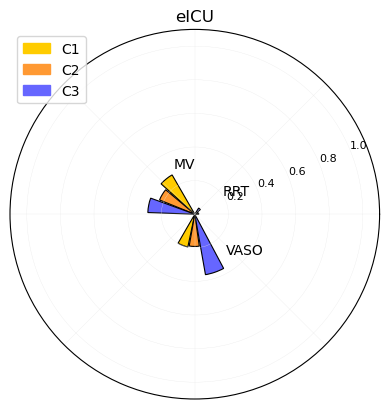

In [ ]:
df = df_eicu_percent_all
plot_sector(df, "eICU") 

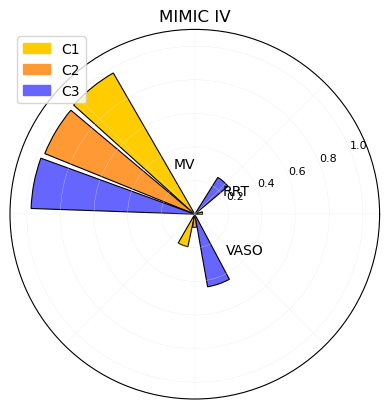

In [ ]:
df = df_mimic_percent_all
plot_sector(df, "MIMIC IV") 

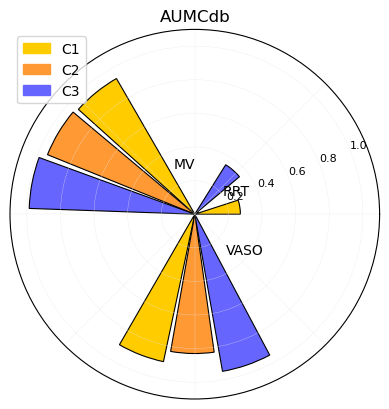

In [ ]:
df = df_aumc_percent_all
plot_sector(df, "AUMCdb") 